## 5.3. Ly6a expression

This notebook plots the expression of Ly6a (also called Sca-1) in four UMAPs and alternatively using a violin plot. 

In [1]:
### loading python libraries

# standard libraries
import numpy as np
import pandas as pd

# single cell libraries
import anndata as ad
import scanpy as sc
sc.settings.verbosity = 0 

# plotting libraries
from matplotlib import cm
from matplotlib import colors
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap #for own cmap
plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text

# other 
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings
import sklearn as sk #used for L2 normalization
import sklearn.preprocessing #used for L2 normalization

# import own functions
from plotting import *

### Load data

Here, we load the filtered HSPC dataset (as filtered in notebook 1.3) and the ISG gene list.

In [2]:
### load Anndata object with the HSPC dataset (all four subsets incl.)
adata_path = "../data/count_matrices/all_filtered.h5ad"
adata = sc.read_h5ad(adata_path)

In [3]:
### L2 normalize dataset
adata.X = sk.preprocessing.normalize(adata.X, norm='l2')

In [4]:
### transform sparse data to dense for downstream purposes
adata.X = adata.X.todense()

### Plot Ly6a expression
Here, we plot the expression per timepoint in a UMAP visualization. Of course, this code can also be used to check the expression of other genes, so feel free to change Ly6a in the first box to whatever gene might be interesting to you.

Afterwards, we also plot the expression per timepoint in each cluster using a violin plot for visualization.

In [5]:
### select gene
gene = "Ly6a"

In [6]:
### get minimum and maximum found ISG score
max_value = adata[:,gene].X.max()
min_value = adata[:,gene].X.min()

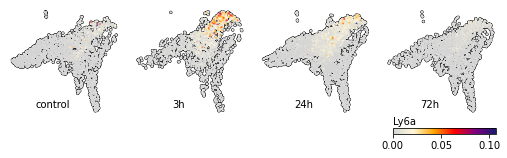

In [7]:
plot_UMAP_per_timepoint(
    adata, 
    gene, 
    min_value=min_value, 
    max_value=max_value,
    save=True, 
    time_key="time",
    save_path="../figures/5.3.ly6a_expression_UMAP.pdf")

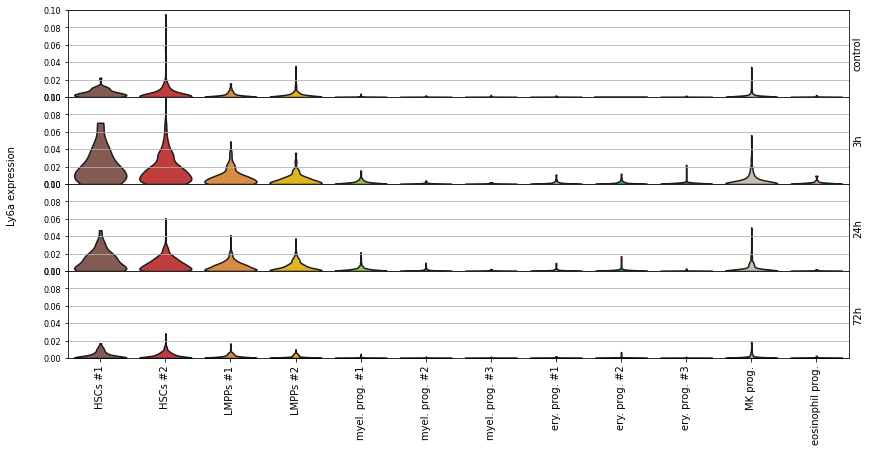

In [8]:
### plot stemness score per cluster for each cluster (violinplot)
times = adata.obs["time"].cat.categories

fig, axs = plt.subplots(len(times), 1, figsize=(14,1.6*len(times)), gridspec_kw={'wspace':0.1, 'hspace':0})

for i in range(len(times)):
    sc.pl.violin(adata[adata.obs["time"] == times[i]], gene, groupby="clusters", ax=axs[int(i)], jitter=0.4, show=False, ylabel=times[i], rotation=90, stripplot=False)

for ax in axs.flat:
    ax.get_xaxis().set_visible(False)
    ax.tick_params(axis='y', which='major', labelsize=8)
    ax.tick_params(axis='y', which='minor', labelsize=8)
    ax.set_ylim(min_value, 0.10)
    ax.yaxis.set_label_position("right")
    ax.grid(axis='y')

fig.text(0.065, 0.5, 'Ly6a expression', va='center', rotation='vertical')    
    
axs[len(times)-1].get_xaxis().set_visible(True)

# save figure
save_path = "../figures/5.3.ly6a_expression_violinplot.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()